In [ ]:
#Jupyter notebook on a birthdates dataset to analyse and look for trends in baby births across the decades.
# by Mark Aziz - marcusazizas@gmail.com

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
#read the dataset into pandas
births = pd.read_csv('births.csv')

In [62]:
#check the head of the dataset
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [63]:
#fill null values and sort make sure no floats
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

In [64]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [65]:
#group year by what decade they are in
births['decade'] = 10 * (births['year'] // 10)

In [66]:
births.tail()

,year,month,day,gender,births,decade
15542,2008,10,0,M,183219,2000
15543,2008,11,0,F,158939,2000
15544,2008,11,0,M,165468,2000
15545,2008,12,0,F,173215,2000
15546,2008,12,0,M,181235,2000


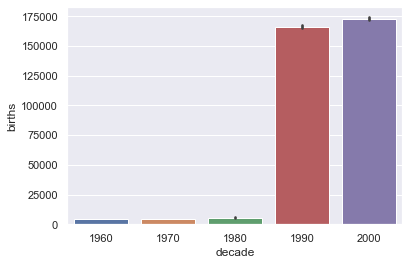

In [68]:
#see the distribution of births across the decades
sns.barplot(x='decade',y='births',data=births)

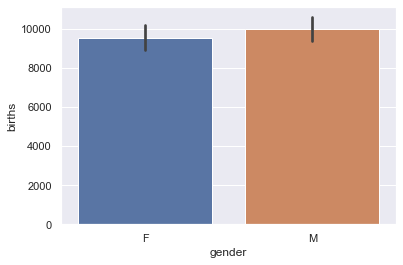

In [69]:
#see the distribution between males and female births in the datasets
sns.barplot(x='gender',y='births',data=births)

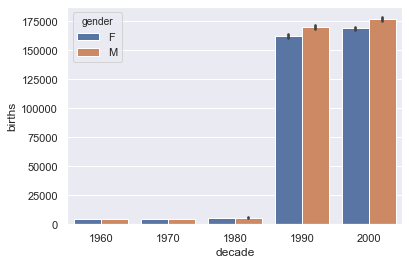

In [70]:
#which sex is born more in each of the different decades
sns.barplot(x='decade',y='births',data=births,hue='gender')

In [71]:
#make a pivot table to show births against decade with a hue of gender
decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [72]:
decade.head()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


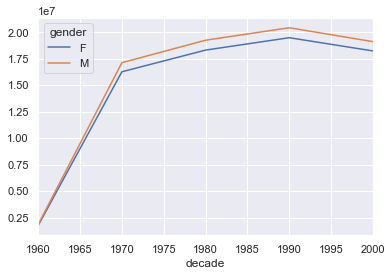

In [73]:
sns.set()
decade.plot()
plt.show()

In [74]:
#change day number to day of the week in string form
births['day'] = births['day'].map({1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})

In [75]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,Monday,F,4046,1960
1,1969,1,Monday,M,4440,1960
2,1969,1,Tuesday,F,4454,1960
3,1969,1,Tuesday,M,4548,1960
4,1969,1,Wednesday,F,4548,1960


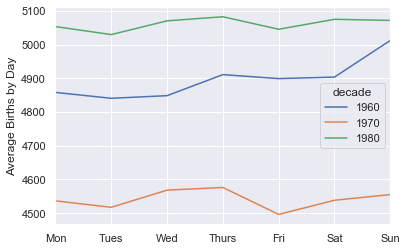

In [84]:
#plot decade against average births per day
births_day = births.pivot_table('births', index=births['day'],
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

In [ ]:
#plot shows that 1980 had the highest average of births and 1970 had the lowest

In [77]:
births['month'] = births['month'].map({1:'January', 2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [ ]:
#make a pivot table to see if there is a particular month when babies are born

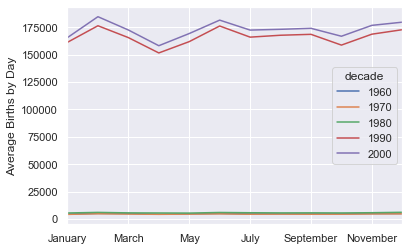

<Figure size 2016x1080 with 0 Axes>

In [85]:
births_month = births.pivot_table('births', index='month',
                                columns='decade', aggfunc='mean')
births_month.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
births_month.plot()
plt.ylabel("Average Births by Day")
plt.figure(figsize=(28,15))
plt.show()

In [ ]:
#No real month which kids are more born in 

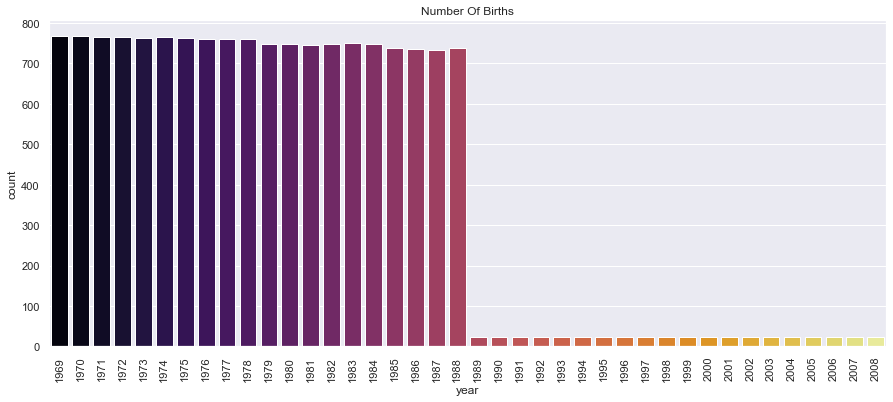

In [86]:
#look at how many data records there are for the years kids are born
plt.subplots(figsize=(15,6))
sns.countplot('year',data=births,palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Births')
plt.show()


In [ ]:
#significant decrease between upto 1988 and 1989 onwards in terms of the number of births

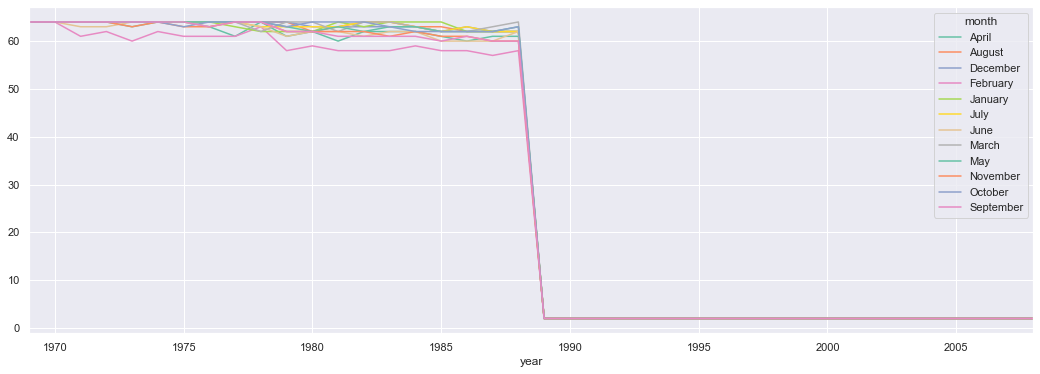

In [88]:
yearmonth=pd.crosstab(births.year,births.month)
yearmonth.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [ ]:
#pd crosstab shows the frequency something appears and as we can see september as a month appears to be the one that stands out for when babies are born

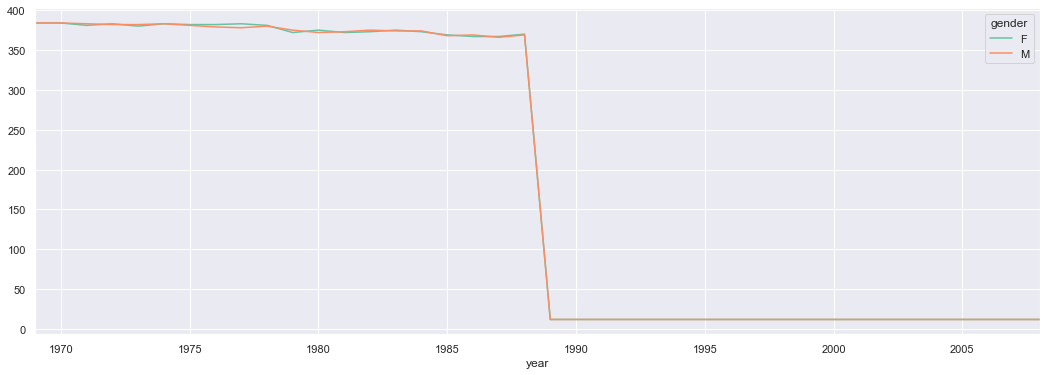

In [89]:
yeargender=pd.crosstab(births.year,births.gender)
yeargender.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [ ]:
#male is the standout gender with more males being born espec from 1989 onwards according to the frequency table.
#the number of records from 1960-1990 is different to 1990 onwards